# Solución al Desafío para Científico de Datos Datup
## by Gabriela Mendoza

In [1]:
import pandas as pd

A continuación presento los DataSet número 1: Agrupación por item y mes, desde Enero 2020 a Enero 2022, la cantidad total de ventas en kilos.

In [2]:
ds1 = pd.read_excel('dataset_1_datup.xlsx')

In [3]:
ds1

,año,mes,Código Material,Suma de Venta Neta Kilos
0,2020,1,1003831,960.0
1,2020,1,1003856,1705.0
2,2020,1,1003861,5510.0
3,2020,1,1003863,2900.0
4,2020,1,1003865,10790.0
...,...,...,...,...
2603,2022,1,3019452,192587.0
2604,2022,1,3021522,5240.0
2605,2022,1,3024410,475.0
2606,2022,1,3024585,10020.0


El Dataset número 2 contiene el máximo, mínimo y promedio de venta en dinero por cada item desde Enero 2021 a Diciembre 2021.

In [4]:
ds2 = pd.read_excel('dataset_2_datup.xlsx')

In [5]:
ds2.head()

,Código Material,Año,Mes,Mín. de Venta Neta ME,Máx. de Venta Neta ME2,Promedio de Venta Neta ME
0,1003831,2021.0,1.0,0,2604816,1.252568e+06
1,1003831,2021.0,2.0,208111,8982669,2.619445e+06
2,1003831,2021.0,3.0,308403,4713666,1.419923e+06
3,1003831,2021.0,4.0,105310,4955296,1.399580e+06
4,1003831,2021.0,5.0,217642,2167160,8.637518e+05


# PRONÓSTICO DE VENTA

Se prepara el ambiente con los requerimientos necesarios y se crea un archivo .py con el siguiente contenido

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from pmdarima.arima import auto_arima

# Título
st.sidebar.markdown("### Predicción de ventas al próximo mes")

# Lectura de Dataframe tratado
base = pd.read_csv("ventas_nuevas_tratada.csv", parse_dates = ["Mes"])

# Toma códigos únicos de producto
productos = np.unique(base["Código Material"])

# Selección de código de producto
producto = st.sidebar.selectbox("Código de producto", tuple(productos))

# Filtro de DataFrame
df = base[base["Código Material"] == producto]
df = df.set_index("Mes")
df = pd.DataFrame(df["Venta Neta Kilos"])

# Título de la página
st.markdown("### Predicción para el producto de código " + str(producto))

model = auto_arima(df.values)

# Mejor modelo
st.markdown("#### Mejor modelo obtenido")
st.write("ARIMA" + str(model.get_params()["order"]) + str(model.get_params()["seasonal_order"]))


# Plot de predicción 

st.markdown("#### Plot de Predicción")
# Forecast
n_periods = 4
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.values), len(df.values)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
fig = plt.figure(figsize=(10.7,7.5))
plt.plot(df.values)
plt.plot(fc_series, color='tab:orange')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage", loc = "left")
st.pyplot(fig)

# Plot de predicción 

st.markdown("#### Predicción para el próximo mes")
st.write(np.round(fc[0],2))

# Plots de diagnóstico
st.markdown("#### Plots de Diagnóstico")
fig = model.plot_diagnostics(figsize=(10.7,7.5))
st.pyplot(fig)

# Sumario de modelos
st.markdown("#### Sumário de Modelo")
st.write(model.summary())

# st.write() - Print
# st.markdown - Markdown
# st.dataframe y st.table - DataFrames
# st.plotly_chart (Plots de Plotly); st.pyplot(Matplotlib, seaborn) - Tiene que emplear sobre una figura (fig)

En la terminal nos ubicamos en la carpeta que contiene nuestros archivos ventas_nuevas_tratada.csv (el cual contiene nuestro dataset principal) y el archivo st_producto_final.py (contiene el código necesario para que streamlit cree la interfaz) y ejecutamos la siguiente línea de código

### streamlit run st_producto_final.py

Y obtenemos una respuesta de la siguiente manera:

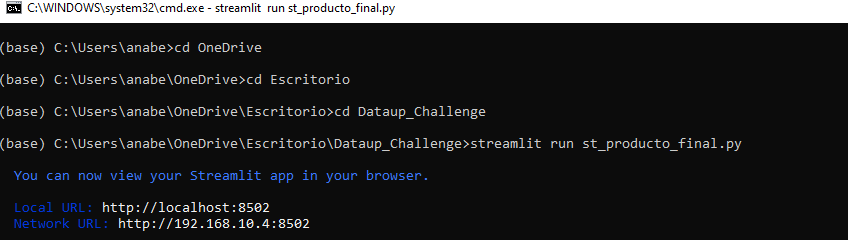

## Tendremos el modelo desplegado en el navegador

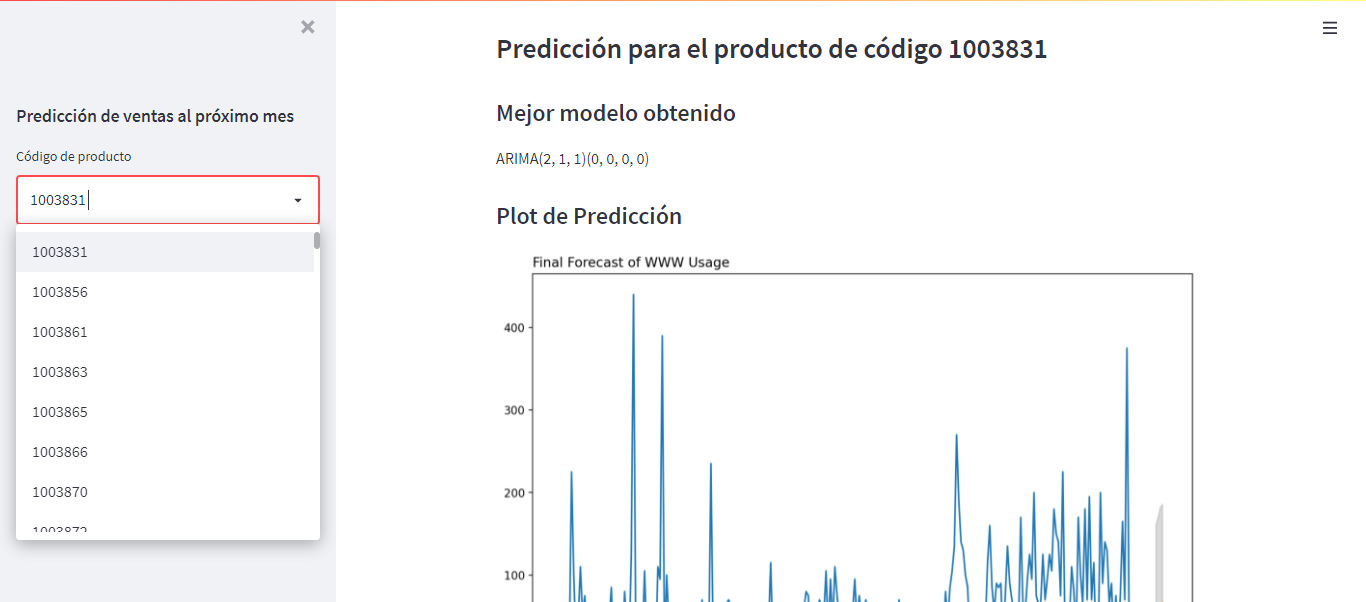

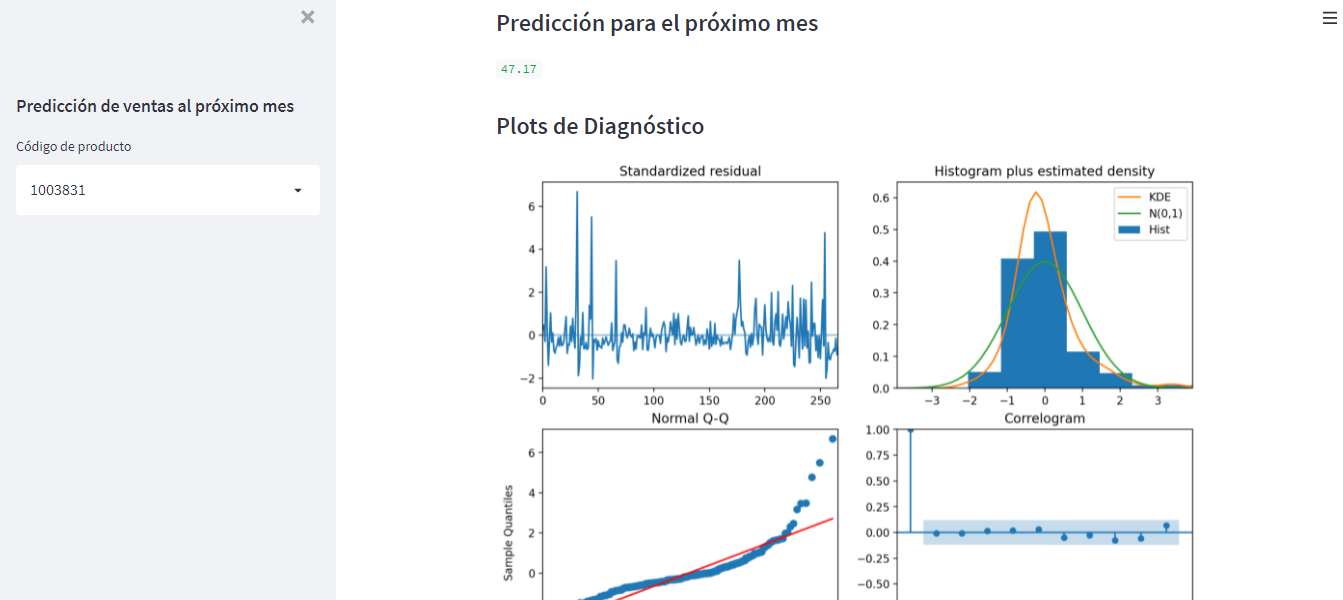

# Para Finalizar

Recordemos que el resultado que se muestra es un MVP, para poder llevarlo a producción se deben corregir algunos errores hallados; disponer de un docker y de una herramienta de monitorización y evaluación del modelo, como por ejemplo ML Flow.